# Ford GoBike System Analysis Presentation
## Precious Okon


## Investigation Overview


In this Presentation I want to take a look at how duration of rides relate to the different gender of riders, user type, start and end day, hour which the highest duration of ride.

My Key insights in this exploration is to find out the duration each gender takes on rides and which particular day and hour each gender like going on rides.



## Dataset Overview
This dataset contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It contains 183412 rides and 16 features on each bike Id. About 8000 rows were removed from the dataset due to missing information.

New Columns start Day, Start Month, start Hour, end day, end month and end hour was introduced into the dataset and this column was extracted from start time and end time column.
After cleaning and removing missing information we are now left with 174952 rides with 22 features.



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


In [2]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('fordgo-bike-data.csv')

In [3]:
#changing the start_time and end_time column from string to datetime
bike[['start_time','end_time']] = bike[['start_time','end_time']].apply(pd.to_datetime)

#Using the fillna function to replace the null values with the most frequent category which is Male
#Since its a categorical data, I have to replace the null values with the most frequent category 
bike = bike.fillna(bike['member_gender'].value_counts().index[0])


In [4]:
#Changing the start_station_id, end_station_id, member_birth_year column from string to numerical data
bike[['start_station_id', 'end_station_id', 'member_birth_year']] = bike[['start_station_id', 
                        'end_station_id', 'member_birth_year']].apply(pd.to_numeric, errors='coerce')


In [5]:
#drop rows with null values
bike.dropna(inplace=True)

#Change bike id datatype from float to string
bike['bike_id'] =bike.bike_id.astype(str)

#Using datetime as dt 
bike['start_day'] = bike['start_time'].dt.day_name()
bike['start_month'] = bike['start_time'].dt.month_name()
# bike['start_year'] = bike['start_time'].dt.year
bike['start_hr'] = bike['start_time'].dt.hour
bike['start_hr'] = bike.start_hr.astype(str)


bike['end_day'] = bike['end_time'].dt.day_name()
bike['end_month'] = bike['end_time'].dt.month_name()
bike['end_hr'] = bike['end_time'].dt.hour
bike['end_hr'] = bike.end_hr.astype(str)

In [6]:
# convert member_gender, user_type, and bike_share_for_all_trip columns into ordered categorical types
ordinal_var_dict = {'member_gender': ['Male','Female','Other'],
                    'user_type': ['Customer', 'Subscriber'],
                    'bike_share_for_all_trip': ['No', 'Yes']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike[var] = bike[var].astype(ordered_var)
    

# convert day, and hour into ordered categorical types
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'start_month': ['Februar'],
                    'end_month': ['February', 'March'],
                    'start_hr': [str(i) for i in range(0,24)],
                    'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike[var] = bike[var].astype(ordered_var)

## Distribution of Rides End Day

Most ride took place on Thurdays which is and most ride took place during the week days while less ride took place during weekend



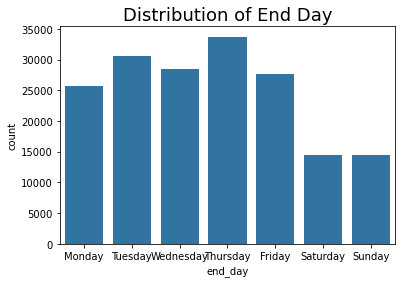

In [7]:
#plotting the distribution of end Day
default_color = sns.color_palette()[0]
sns.countplot(data = bike, x = 'end_day',  color=default_color)
plt.title('Distribution of End Day', fontsize = 18)
plt.show();

## Distribution of Rides Per Gender

The male Gender took the most ride with over 74% frequency

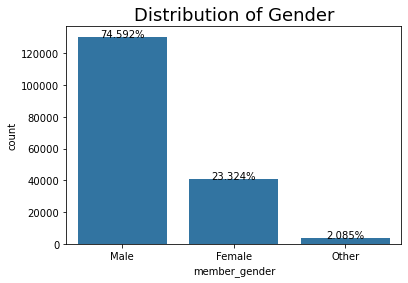

In [8]:
# Distribution of Gender
ax = sns.countplot(data = bike, x = 'member_gender',  color=sns.color_palette()[0], order=bike.member_gender.value_counts().index)

total = len(bike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.title ('Distribution of Gender', fontsize = 18)
plt.show();

## Relationship Between Rides End Month and User Type

Subscriber generally had more ride than customers in the month of February


Text(0.5, 1.0, 'Relationship Between End Month and User type')

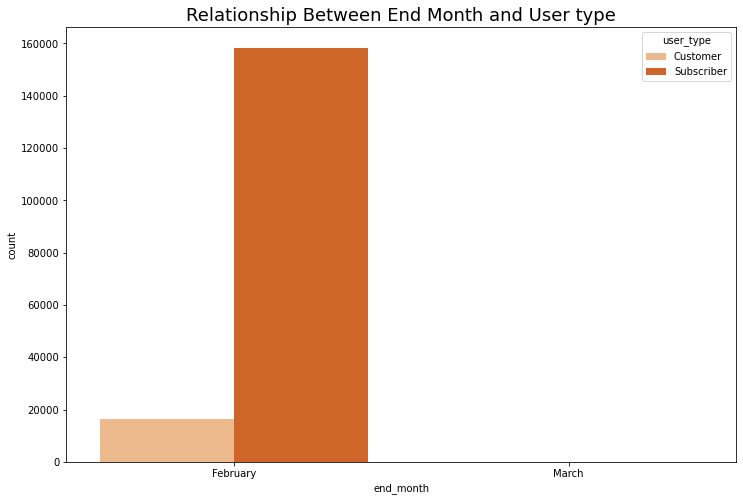

In [9]:
#Plot to know the relationship between user type and start hr
plt.figure(figsize = [12, 8])
sns.countplot(data = bike, x = 'end_month', hue = 'user_type', palette = 'Oranges')
plt.title ('Relationship Between End Month and User type', fontsize = 18)

## Ride Duration Across Gender and User Type

Customers who were identified as Other gender had longer ride duration than male and female customers

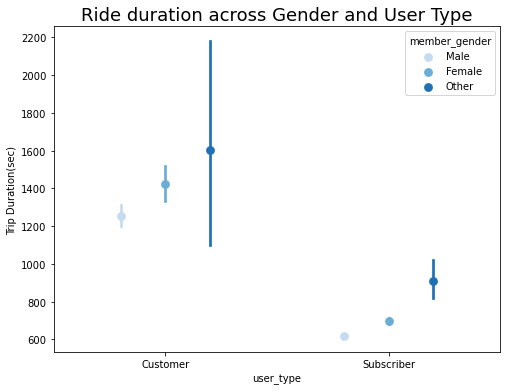

In [11]:
#plotting to show the relationship of duration across member gender and user type
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = bike, x = 'user_type', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Ride duration across Gender and User Type', fontsize =18)
plt.ylabel('Trip Duration(sec)')
ax.set_yticklabels([],minor = True)
plt.show();

## Ride Duration Across Hour and Gender

The gender category Other has long duration when the start their ride with 2nd or 3rd hour

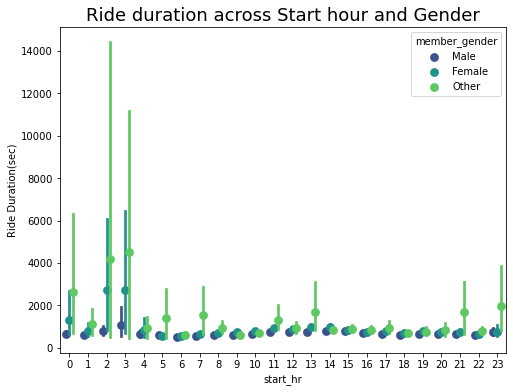

In [16]:
#plotting to show the relationship of duration across member gender and user type
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = bike, x = 'start_hr', y = 'duration_sec', hue = 'member_gender',
           palette = 'viridis', linestyles = '', dodge = 0.4)
plt.title('Ride duration across Start hour and Gender', fontsize = 18)
plt.ylabel('Ride Duration(sec)')
ax.set_yticklabels([],minor = True)
plt.show();

## Ride Duration Across Day and Gender

It can be observed that other genders prefer going on ride during weekends especially on Sunday and they usually have ride duration of over 1800 per seconds during weekends


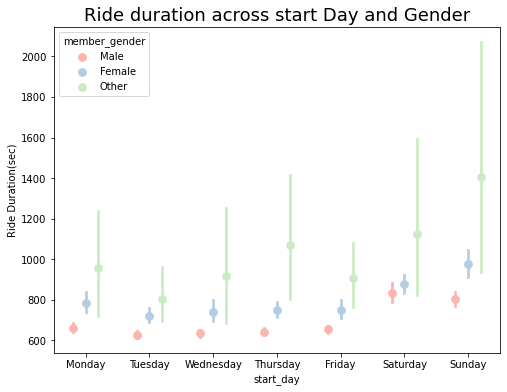

In [15]:
#plotting to show the relationship of duration across member gender and user type
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = bike, x = 'start_day', y = 'duration_sec', hue = 'member_gender',
           palette = 'Pastel1', linestyles = '', dodge = 0.4)
plt.title('Ride duration across start Day and Gender', fontsize = 18)
plt.ylabel('Ride Duration(sec)')
ax.set_yticklabels([],minor = True)
plt.show();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Bike_slide_deck_Part_II.ipynb --to slides --post serve --no-input --no-prompt